In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy import units as u
from __plt__ import *

def my_autopct(pct):
    return (f'{pct:.2f}%') if pct > 5 else ''


In [2]:
gauss_simple_path = r"E:\databases\GAMAs4\GaussFitSimplev05"
gauss_complex_path = r"E:\databases\GAMAs4\GaussFitComplexv05"
bpt_whan_path = r"E:\databases\GAMAs4\DETG_DR4.csv"

output_path = r'E:/databases/Gauss.csv'

In [3]:
GaussSimpleDict = {
    0 : 'SPECID',
    1 : 'CATAID',
    4 : 'Z',
    
    55 : 'HB_REDCHI_ABS',
    56 : 'HB_REDCHI_EM',
    57 : 'HB_FITFAIL',
    58 : 'HB_MODSEL_EM_LINE',
    59 : 'HB_MODSEL_ABS_LINE',
    60 : 'HB_MODSEL_EM_ABS',
    64 : 'HB_CEN',
    69 : 'SIG_HB',
    70 : 'SIG_HB_ERR',
    
    103 : 'HA_REDCHI_ABS',
    104 : 'HA_REDCHI_EM',
    105 : 'HA_FITFAIL',
    106 : 'HA_MODSEL_EM_LINE',
    107 : 'HA_MODSEL_ABS_LINE',
    108 : 'HA_MODSEL_EM_ABS',
    112 : 'HA_CEN',
    117 : 'SIG_HA',
    118 : 'SIG_HA_ERR'
}
GaussSimple = pd.read_csv(gauss_simple_path, sep=r"\s+", header=None, index_col=0, engine='python', usecols=GaussSimpleDict.keys(), names=GaussSimpleDict.values())

GaussComplexDict = {
    0 : 'SPECID',
    1 : 'CATAID',
    
    6 : 'HB_REDCHI_EMB',
    7 : 'HB_REDCHI_EMABS',
    8 : 'HB_FITFAIL',
    10 : 'HB_MODSEL_EM_LINE',
    11 : 'HB_MODSEL_EMB_EM',
    12 : 'HB_MODSEL_NABS_N',
    16 : 'HB_CEN',
    21 : 'SIG_HB_N',
    22 : 'SIG_HB_N_ERR',
    23 : 'HB_N_FLUX',
    24 : 'HB_N_FLUX_ERR',
    42 : 'SIG_HB_B',
    43 : 'SIG_HB_B_ERR',
    44 : 'HB_B_FLUX',
    45 : 'HB_B_FLUX_ERR',
    
    75 : 'HA_REDCHI_EMB',
    76 : 'HA_REDCHI_EMABS',
    77 : 'HA_FITFAIL',
    79 : 'HA_MODSEL_EM_LINE',
    80 : 'HA_MODSEL_EMB_EM',
    81 : 'HA_MODSEL_NABS_N',
    85 : 'HA_CEN',
    90 : 'SIG_HA_N',
    91 : 'SIG_HA_N_ERR',
    92 : 'HA_N_FLUX',
    93 : 'HA_N_FLUX_ERR',
    111 : 'SIG_HA_B',
    112 : 'SIG_HA_B_ERR',
    113 : 'HA_B_FLUX',
    114 : 'HA_B_FLUX_ERR'
}

GaussComplex = pd.read_csv(gauss_complex_path, sep=r"\s+", header=None, index_col=0, engine='python', usecols=GaussComplexDict.keys(), names=GaussComplexDict.values())
BPT_WHAN = pd.read_csv(bpt_whan_path, usecols=['SPECID', 'CATAID', 'Z', 'BPT', 'WHAN', 'mass_stellar_percentile50'])

databases = [BPT_WHAN, GaussComplex, GaussSimple]
# print(NewD.shape)

from functools import reduce
NewDataBase = reduce(lambda  left,right: pd.merge(left,right,on=['SPECID'],
                                            how='inner'), databases)

NewDataBase.to_csv(output_path, index=False)

In [4]:
# exc_ha = pd.read_csv(r'E:\backup\backup_BPT\Sep2023\SDSS_Spectra\exceptions_ha.csv', usecols=['SPECID'])
# exc_hb = pd.read_csv(r'E:\backup\backup_BPT\Sep2023\SDSS_Spectra\exceptions_hb.csv', usecols=['SPECID'])

db = pd.read_csv(output_path, sep=',', index_col=False)
db['HA_N_FLUX'] = pd.to_numeric(db['HA_N_FLUX'], errors='coerce')
db['HA_N_FLUX_ERR'] = pd.to_numeric(db['HA_N_FLUX_ERR'], errors='coerce' )
db['SIG_HA_B'] = pd.to_numeric(db['SIG_HA_B'], errors='coerce')
db['SIG_HA_B_ERR'] = pd.to_numeric(db['SIG_HA_B_ERR'], errors='coerce')
db['SIG_HA_ERR'] = pd.to_numeric(db['SIG_HA_ERR'], errors='coerce')

# BroadAGN_HA = db.query('SIG_HA_B > 0 & SIG_HA_B_ERR > 0 & SIG_HA_N > 0 & SIG_HA_N_ERR > 0 & HA_FITFAIL_x == 0 & HA_MODSEL_EMB_EM > 0 & HA_N_FLUX > 0 & HA_N_FLUX > 2*HA_N_FLUX_ERR & HA_B_FLUX > 0 & HA_B_FLUX > 2*HA_B_FLUX_ERR')
BroadAGN_HA = db.query('HA_FITFAIL_x == 0 & HA_MODSEL_EM_LINE_x > 0 & HA_MODSEL_EMB_EM > 0 & SIG_HA_B > 0 & SIG_HA_B_ERR > 0 & HA_B_FLUX > 0 & HA_B_FLUX > 2*HA_B_FLUX_ERR')
BroadAGN_HA['VEL_B_HA'] = np.log10(BroadAGN_HA['SIG_HA_B']*c.to('km/s').value/BroadAGN_HA['HA_CEN_x'])
BroadAGN_HA['VEL_B_HA_ERR'] = np.log10(BroadAGN_HA['SIG_HA_B_ERR']*c.to('km/s').value/BroadAGN_HA['HA_CEN_x'])
# BroadAGN_HA = BroadAGN_HA[BroadAGN_HA.SPECID.isin(exc_ha['SPECID']) == False]
BroadAGN_HA.reset_index(inplace=True, drop=True)
BroadAGN_HA['BLR_HA'] = True
BroadAGN_HA.to_csv('broads_ha.csv', index=False)

BroadAGN_HB = db.query('HB_FITFAIL_x == 0 & HB_MODSEL_EM_LINE_x > 0 & HB_MODSEL_EMB_EM > 0 & SIG_HB_B > 0 & SIG_HB_B_ERR > 0 & HB_B_FLUX > 0 & HB_B_FLUX > 2*HB_B_FLUX_ERR')
BroadAGN_HB['VEL_B_HB'] = np.log10(BroadAGN_HB['SIG_HB_B']*c.to('km/s').value/BroadAGN_HB['HB_CEN_x'])
BroadAGN_HB['VEL_B_HB_ERR'] = np.log10(BroadAGN_HB['SIG_HB_B_ERR']*c.to('km/s').value/BroadAGN_HB['HB_CEN_x'])
# BroadAGN_HB = BroadAGN_HB[BroadAGN_HB.SPECID.isin(exc_hb['SPECID']) == False]
BroadAGN_HB.reset_index(inplace=True, drop=True)
BroadAGN_HB['BLR_HB'] = True
BroadAGN_HB.to_csv('broads_hb.csv', index=False)

BroadAGN_HA_HB = pd.merge(BroadAGN_HB, BroadAGN_HA, on='SPECID', how='inner')
BroadAGN_HA_HB.reset_index(inplace=True, drop=True)
BroadAGN_HA_HB.to_csv('broads_ha_hb.csv', index=False)

# BroadAGN_HB = db.query('SIG_HB_B > 0 & SIG_HB_B_ERR > 0 & SIG_HB_N > 0 & SIG_HB_N_ERR > 0 & HB_FITFAIL_x == 0 & HB_REDCHI_EMB < HB_REDCHI_EM & HB_N_FLUX > 0 & HB_N_FLUX > 2*HB_N_FLUX_ERR & HB_B_FLUX > 0 & HB_B_FLUX > 2*HB_B_FLUX_ERR')
# BroadAGN_HB['VEL_B_HB'] = np.log10(BroadAGN_HB['SIG_HB_B']*c.to('km/s').value/BroadAGN_HB['HB_CEN_x'])
# BroadAGN_HB['VEL_B_HB_ERR'] = np.log10(BroadAGN_HB['SIG_HB_B_ERR']*c.to('km/s').value/BroadAGN_HB['HB_CEN_x'])
# BroadAGN_HB.to_csv('broads_hb.csv', index=False)

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_15200\4233241133.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BroadAGN_HA['VEL_B_HA'] = np.log10(BroadAGN_HA['SIG_HA_B']*c.to('km/s').value/BroadAGN_HA['HA_CEN_x'])
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_15200\4233241133.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BroadAGN_HA['VEL_B_HA_ERR'] = np.log10(BroadAGN_HA['SIG_HA_B_ERR']*c.to('km/s').value/BroadAGN_HA['HA_CEN_x'])
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_15

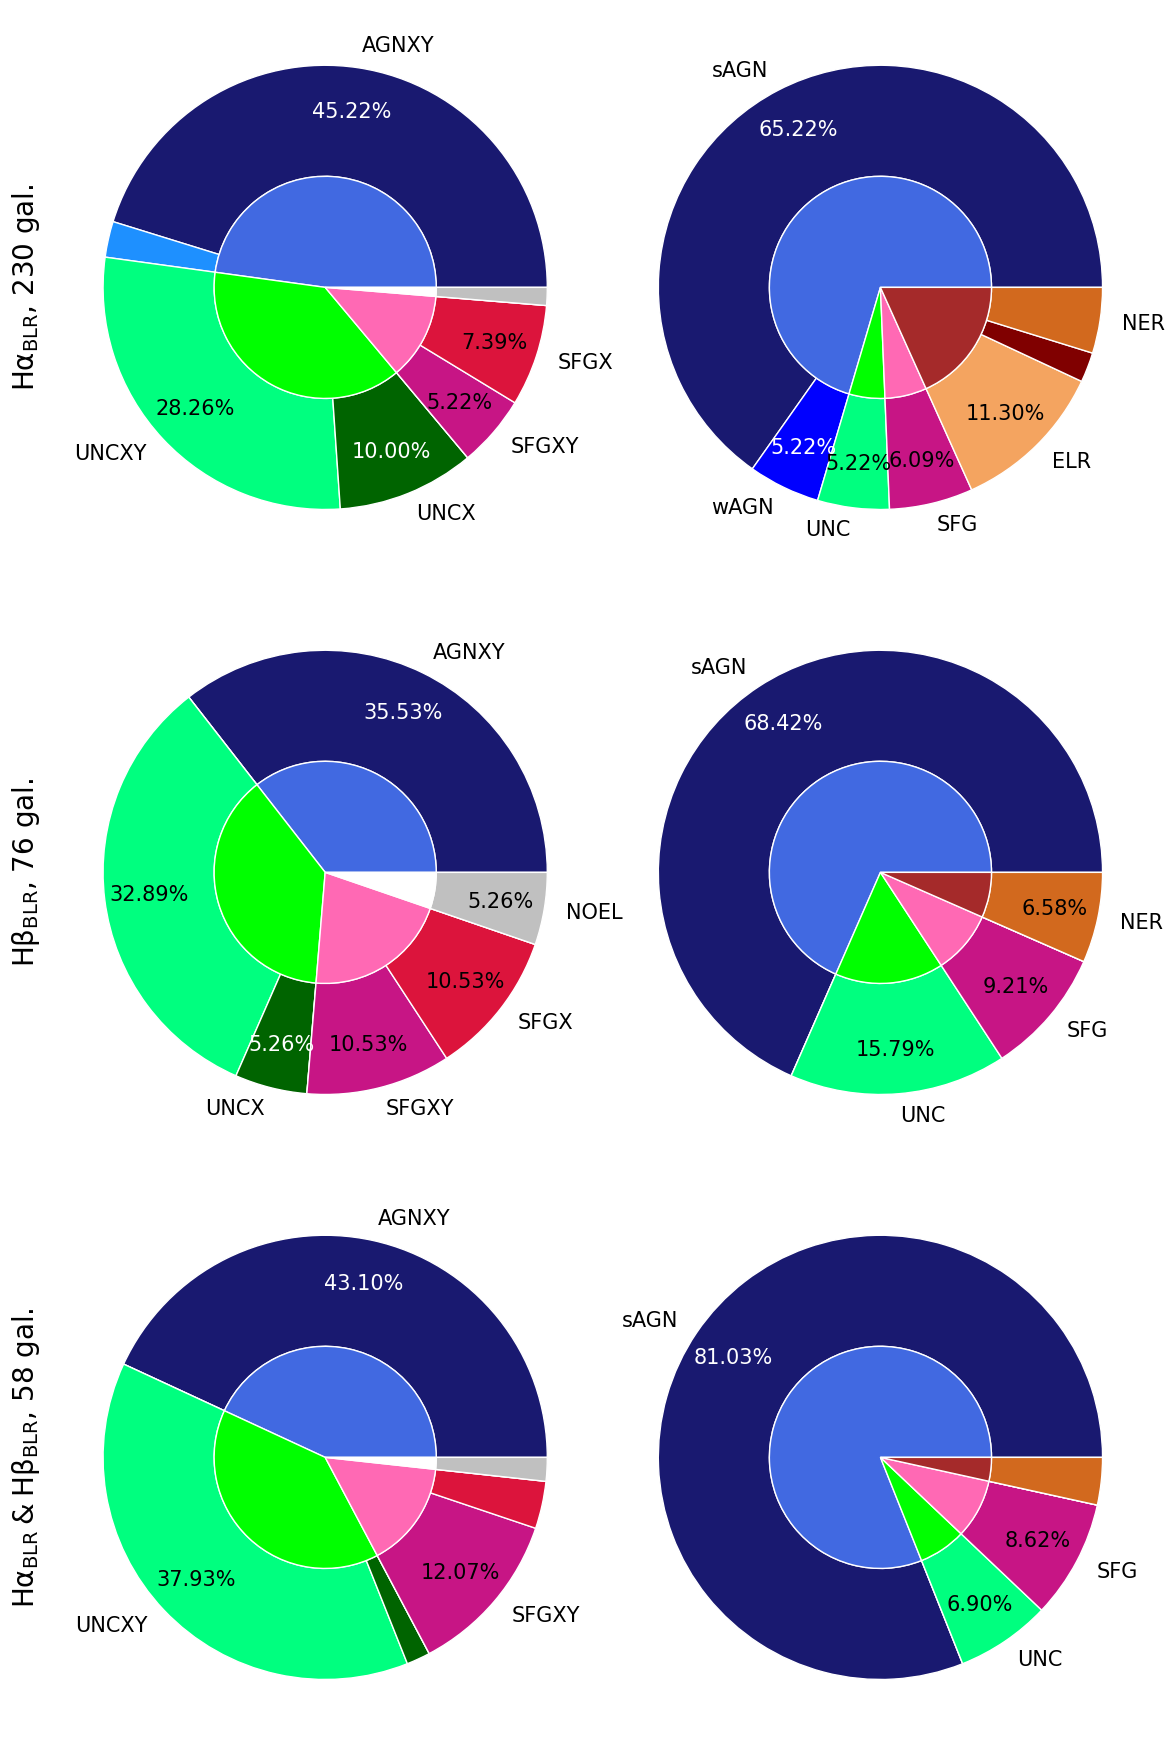

In [5]:
gs_top = plt.GridSpec(3, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 18), tight_layout=True)

plt.rcParams['font.size'] = 15

ax1 = fig.add_subplot(gs_top[0,0])
ax1.set_ylabel(r'$\mathrm{H\alpha_{BLR}}$, 230 gal.', fontsize=20)
ax2 = fig.add_subplot(gs_top[0,1])

ax3 = fig.add_subplot(gs_top[1,0])
ax3.set_ylabel(r'$\mathrm{H\beta_{BLR}}$, 76 gal.', fontsize=20)
ax4 = fig.add_subplot(gs_top[1,1])
ax5 = fig.add_subplot(gs_top[2,0])
ax5.set_ylabel(r'$\mathrm{H\alpha_{BLR} \: & \: H\beta_{BLR}}$, 58 gal.', fontsize=20)
ax6 = fig.add_subplot(gs_top[2,1])

# size = 0.45
# BroadAGN_HA.reset_index(inplace=True, drop=True)

# WHAN_labels = ['sAGN', 'wAGN', 'UNC', 'SFG', 'ELR', 'LLR', 'NER']
# WHAN_colors = ['midnightblue', 'blue', 'springgreen', 'mediumvioletred', 'sandybrown', 'maroon', 'chocolate']

# BPT_labels = ['AGNXY', 'AGNX', 'UNCXY', 'UNCX', 'UNCY', 'SFGXY', 'SFGX', 'SFGY', 'NOEL']
# BPT_colors = ['midnightblue', 'dodgerblue', 'springgreen', 'darkgreen', 'limegreen', 'mediumvioletred', 'crimson', 'fuchsia', 'silver']

# BPT_colors_merged = ['royalblue', 'lime', 'hotpink', 'w']
# WHAN_colors_merged = ['royalblue', 'lime', 'hotpink', 'brown']


ax1 = plotting_round_histo_BPT(ax1, BroadAGN_HA['BPT'])

ax2 = plotting_round_histo_WHAN(ax2, BroadAGN_HA['WHAN'])

ax3 = plotting_round_histo_BPT(ax3, BroadAGN_HB['BPT'])

ax4 = plotting_round_histo_WHAN(ax4, BroadAGN_HB['WHAN'])

ax5 = plotting_round_histo_BPT(ax5, BroadAGN_HA_HB['BPT_x'])

ax6 = plotting_round_histo_WHAN(ax6, BroadAGN_HA_HB['WHAN_x'])

fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\BLRs.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)


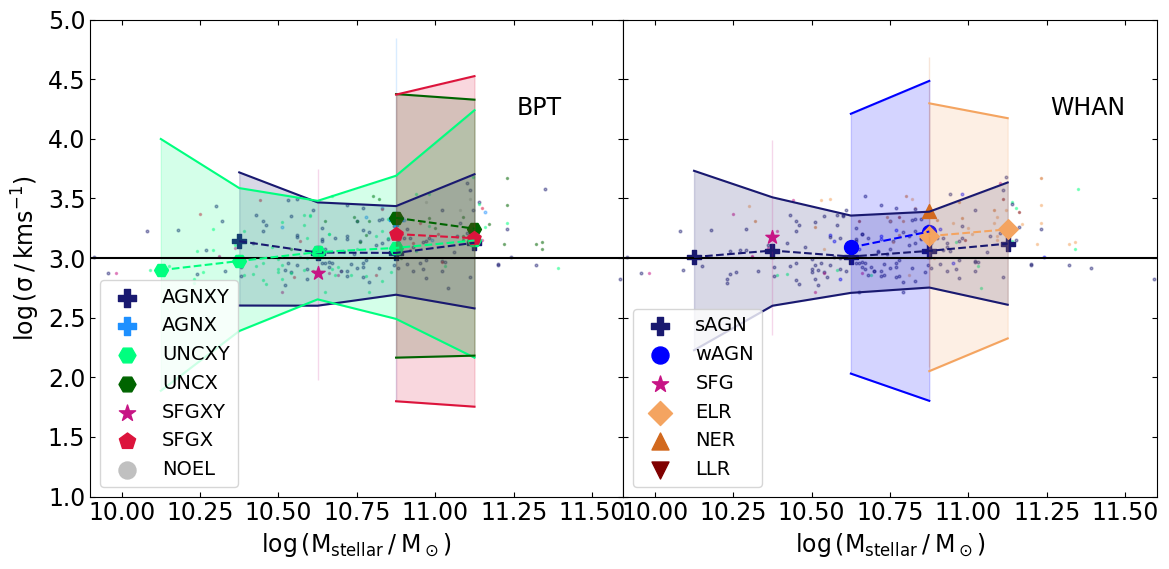

In [6]:
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]

db = BroadAGN_HA

gs_top = plt.GridSpec(1, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 6), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)

pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'VEL_B_HA',
    'err' : 'VEL_B_HA_ERR',
    'xlim' : [9.9, 11.6],
    'ylim' : [1, 5],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(1, 5.1, 0.5),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(\sigma \: / \: km s^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : True
}

ax1.axhline(3, color='k')
ax2.axhline(3, color='k')

ax1, ax2 = plotting(pars_dict_1)
fig.savefig('sigma_ms.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)

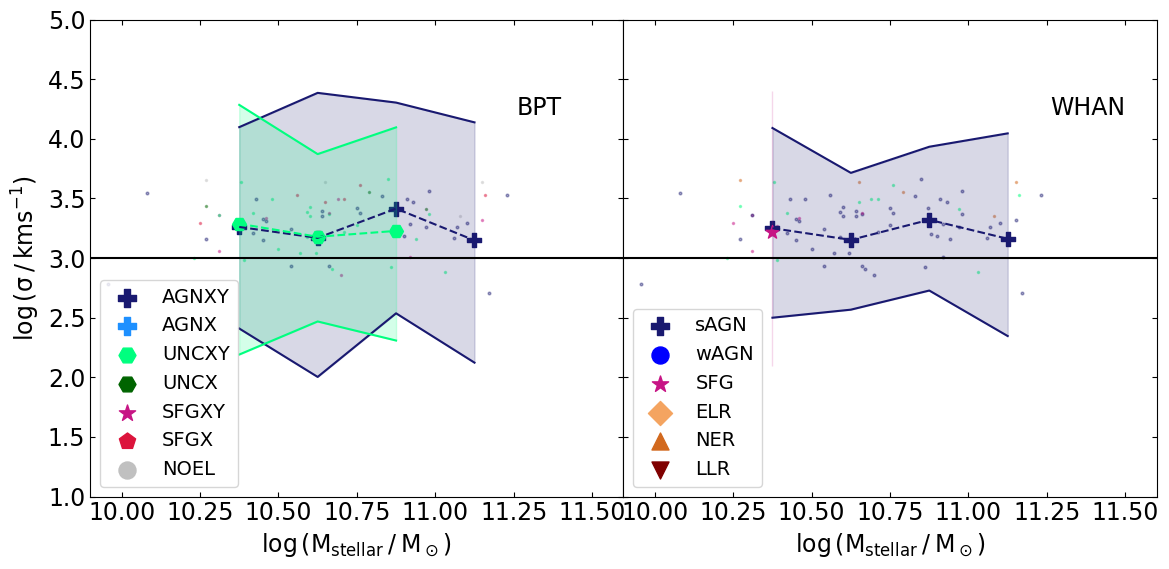

In [7]:
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]

BroadAGN_HB.reset_index(inplace=True, drop=True)
db = BroadAGN_HB

gs_top = plt.GridSpec(1, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 6), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)

pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'VEL_B_HB',
    'err' : 'VEL_B_HB_ERR',
    'xlim' : [9.9, 11.6],
    'ylim' : [1, 5],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(1, 5.1, 0.5),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(\sigma \: / \: km s^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : True
}

ax1, ax2 = plotting(pars_dict_1)

ax1.axhline(3, color='k')
ax2.axhline(3, color='k')

fig.savefig('sigma_ms.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)